# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b> Resposta </b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">

<b>Comentário geral v1: </b> <a class="tocSkip"></a>

Parabéns pea conclusão do projeto, Bruno! 🎉 Seu projeto já está com uma qualidade muito boa! 
Precisamos de  **ajuste na sessão de tratamento de datas timestamp e nos testes dos eventos**. Após o ajuste, por favor rode o restante do seu projeto, assim conseguiremos avaliar os resultados corretamente. 


Em caso de dúvidas, não hesite em nos perguntar!

Boa sorte! 🍀 
</div>

<div class="alert alert-block alert-success">

<b>Comentário geral v2: </b> <a class="tocSkip"></a>

Obrigada pelos ajustes! O projeto está aprovado!

1. Importação das bibliotecas:



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [3]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente usando o separador `\t`
- O import das bibliotecas foi feito de forma correta e em uma célula separada
</div>

2. Preparando os dados

In [5]:
# Renomeando colunas
df.columns = ['event_name', 'user_id', 'timestamp', 'exp_id']


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os nomes das colunas foram convertidos para seguir o padrão `snake_case`
</div>

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [7]:
print(df['timestamp'].dtype)

datetime64[ns]


In [8]:
df['date'] = df['timestamp'].dt.date

In [9]:
df['hour_min_sec'] = df['timestamp'].dt.strftime('%H:%M:%S')

In [10]:
df.head()

,event_name,user_id,timestamp,exp_id,date,hour_min_sec
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42


3. Estudando e verificando os dados

In [11]:
# 1. Quantos eventos há nos registros?

total_eventos = len(df)
print(f"Total de eventos: {total_eventos}")

Total de eventos: 244126


In [12]:
# 2. Quantos usuários únicos?

usuarios_unicos = df['user_id'].nunique()
print(f"Usuários únicos: {usuarios_unicos}")

Usuários únicos: 7551


In [13]:
# 3. Número médio de eventos por usuário

media_eventos_por_usuario = total_eventos / usuarios_unicos
print(f"Média de eventos por usuário: {media_eventos_por_usuario:.2f}")

Média de eventos por usuário: 32.33


In [14]:
data_min = df['timestamp'].min()
data_max = df['timestamp'].max()

print(f"Período: {data_min} até {data_max}")

Período: 2019-07-25 04:43:36 até 2019-08-07 21:15:17


In [15]:
# 4. Período de tempo coberto pelos dados
data_min = df['timestamp'].min()
data_max = df['timestamp'].max()

print(f"Período: {data_min} até {data_max}")

Período: 2019-07-25 04:43:36 até 2019-08-07 21:15:17


In [16]:
eventos_por_periodo = df.groupby('date').size()
eventos_por_periodo

date
2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      413
2019-07-31     2031
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
dtype: int64

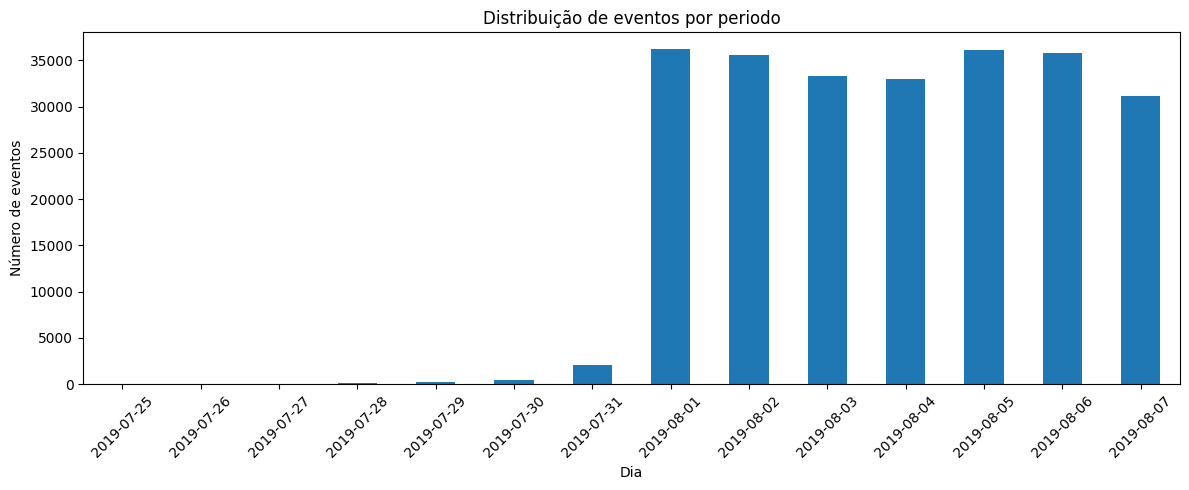

In [17]:
# 5. Histograma por período para verificar a completude
plt.figure(figsize=(12, 5))
eventos_por_periodo.plot(kind='bar')
plt.title('Distribuição de eventos por periodo')
plt.xlabel('Dia')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip">
    
O código acima necessita de ajustes. Perceba que as datas do gráfico estão distorcidas. O motivo pelo qual ocorre o erro acima está relacionado à necessidade de ajustar o processamento do timestamp.

Para resolver isso, siga o passo a passo abaixo:

**1. Realizar a conversão da variável event_time utilizando o argumento unit='s'**
O argumento unit='s' indica que os valores de event_time estão representando timestamps em segundos desde a época (1970-01-01). Portanto, é necessário fazer a conversão correta para obter a data e hora.

Exemplo de código:

```python
logs_data['event_time'] = pd.to_datetime(logs_data['event_time'], unit='s')
```
    
**2. Criar uma nova variável representando a data do evento sem os segundos**
Após a conversão, se necessário, podemos criar uma nova variável contendo apenas a data (sem os segundos).

**3. Realizar o filtro temporal com base na data**
Agora que a variável de data foi ajustada, você pode filtrar os dados com base em uma faixa temporal específicaç

    
    
O output esperado é semelhante a esse, com o correto formato em timestamp e a data: 
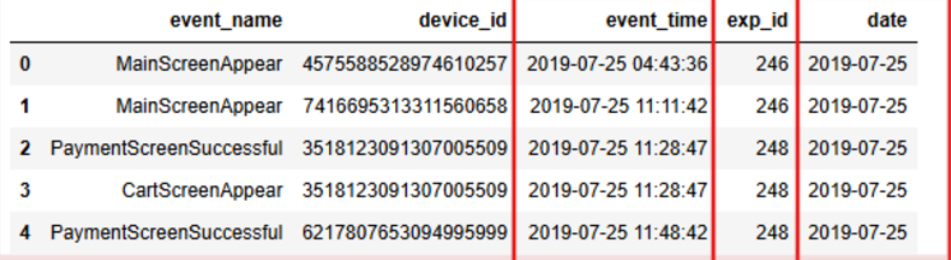

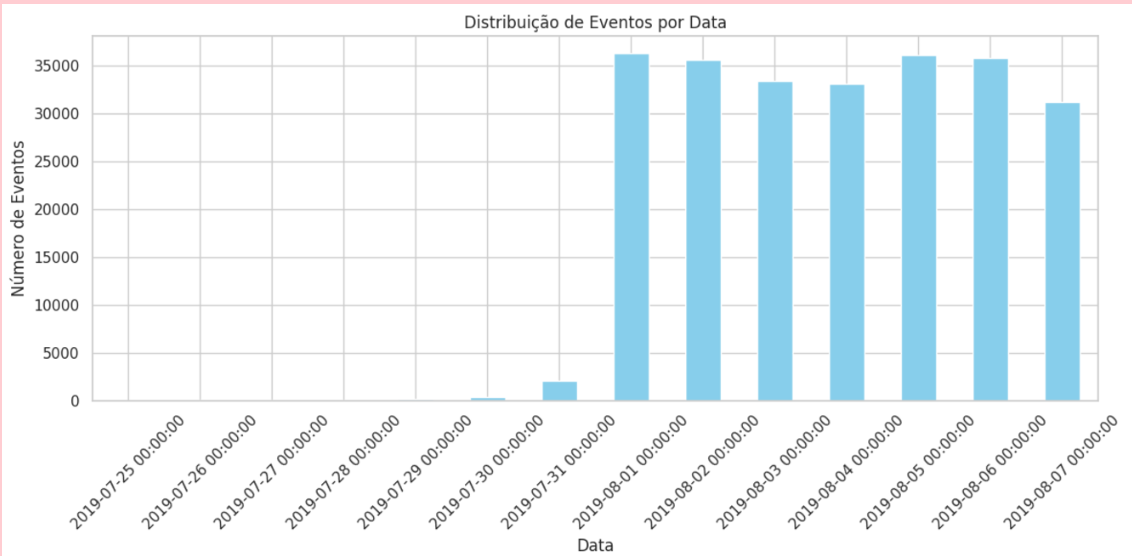


Esses passos devem corrigir o problema com o timestamp e permitir a análise e filtragem adequadas dos dados. Se precisar de mais detalhes, estou à disposição para ajudar!
    
  

In [18]:
#Encontrar um momento a partir da qual os dados são confiáveis
eventos_por_periodo[eventos_por_periodo > 100]

date
2019-07-28      105
2019-07-29      184
2019-07-30      413
2019-07-31     2031
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
dtype: int64

Esse intervalo das 02:36:47 até às 02:46:51 parece ser seguro e confiável

In [19]:
# Verificar se há usuários de todos os três grupos experimentais

print(df['exp_id'].value_counts())

248    85747
246    80304
247    78075
Name: exp_id, dtype: int64


3 grupos estão presentes

4. funil de eventos

In [20]:
# 1. Frequência de eventos (quantas vezes cada evento ocorreu)

event_counts = df['event_name'].value_counts()
print(event_counts)

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event_name, dtype: int64


In [21]:
# 2. Quantos usuários executaram cada evento?

users_per_event = df.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
users_per_event

event_name
MainScreenAppear           7439
OffersScreenAppear         4613
CartScreenAppear           3749
PaymentScreenSuccessful    3547
Tutorial                    847
Name: user_id, dtype: int64

In [22]:
# 3. Proporção de usuários que executaram cada evento (considerando total de usuários únicos)

total_users = df['user_id'].nunique()
prop_user_evento = users_per_event / total_users
print(prop_user_evento)

event_name
MainScreenAppear           0.985168
OffersScreenAppear         0.610912
CartScreenAppear           0.496491
PaymentScreenSuccessful    0.469739
Tutorial                   0.112171
Name: user_id, dtype: float64


Ordem mais plausível do funil:

    MainScreenAppear – quase todos os usuários entram no app pela tela principal.

    OffersScreenAppear – uma parte vê ofertas antes de adicionar ao carrinho.

    CartScreenAppear – quase metade dos usuários adiciona algo ao carrinho.

    PaymentScreenSuccessful – parte significativa finaliza a compra.

    Tutorial – baixa ocorrência

In [23]:
usuarios_inicio = users_per_event['MainScreenAppear']
usuarios_fim = users_per_event['PaymentScreenSuccessful']

parcela_total = usuarios_fim / usuarios_inicio
print(f"Parcela de usuários que completam o funil: {parcela_total:.2%}")

Parcela de usuários que completam o funil: 47.68%


    Alta adesão inicial:

98,5% dos usuários visualizam a tela principal (MainScreenAppear), 
o que indica que a maioria dos usuários inicia a jornada no app com 
sucesso.

    Maior queda na segunda etapa:

A conversão de MainScreenAppear → OffersScreenAppear é de apenas 
62,01%. Isso indica que quase 38% dos usuários não 
avançam para ver as ofertas, o que pode significar:

            Falta de clareza no design da tela inicial.

            Dificuldade em encontrar o botão ou link para as ofertas.

            Desinteresse imediato no produto.

    Etapas intermediárias funcionam bem:

A taxa de conversão de OffersScreenAppear → CartScreenAppear é de 
81,27%, o que é excelente.
Isso mostra que, entre os que veem as ofertas, a maioria se 
interessa e coloca produtos no carrinho.

    Quase nenhum abandono na última etapa:

A conversão de CartScreenAppear → PaymentScreenSuccessful é de 94,61%.
Isso mostra que a experiência de pagamento é eficiente e confiável, 
com quase todos que chegam ao carrinho finalizando a compra.

📌 Recomendações

Investigar a tela principal (MainScreenAppear) para entender por que 
tantos usuários não seguem adiante:

Testar novos layouts, destacar melhor as ofertas, ou incluir chamadas 
de ação mais claras.

Realizar testes A/B especificamente nessa tela pode revelar
oportunidades de otimização.

Manter o bom desempenho das etapas finais:

A alta conversão do carrinho até o pagamento mostra que o processo
de checkout está bem implementado — vale manter e reforçar essa 
estrutura.

In [24]:
df.head()

,event_name,user_id,timestamp,exp_id,date,hour_min_sec
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42


5. TESTE A/A ENTRE O GRUPO 246, 247 e 248

In [25]:
# 1. Quantos usuários há em cada grupo?
usuarios_por_grupo = df.groupby('exp_id')['user_id'].nunique()
print(usuarios_por_grupo)

exp_id
246    2489
247    2520
248    2542
Name: user_id, dtype: int64


In [36]:
def testar_eventos_por_grupo(df, grupo1=246, grupo2=247,alpha=0.1):
    eventos = df['event_name'].unique()
    resultados = []
    for evento in eventos:
        # Filtra usuários únicos que realizaram o evento em cada grupo
        usuarios_246 = df[(df['exp_id'] == grupo1) & (df['event_name'] == evento)]['user_id'].nunique()
        usuarios_247 = df[(df['exp_id'] == grupo2) & (df['event_name'] == evento)]['user_id'].nunique()

        # Total de usuários únicos em cada grupo (base total do grupo)
        total_246 = df[df['exp_id'] == grupo1]['user_id'].nunique()
        total_247 = df[df['exp_id'] == grupo2]['user_id'].nunique()

        # Executa o teste
        z_stat, p_value = proportions_ztest([usuarios_246, usuarios_247], [total_246, total_247])

        resultados.append({
            'evento': evento,
            'grupo1 (%)': usuarios_246 / total_246,
            'grupo2 (%)': usuarios_247 / total_247,
            'z': z_stat,
            'p': p_value
        })

    
    return pd.DataFrame(resultados).sort_values('p')

In [42]:
# Transformando em DataFrame para visualização
resultado_246_vs_247 = testar_eventos_por_grupo(df, 246, 247)
resultado_246_vs_247

,evento,grupo1 (%),grupo2 (%),z,p
1,PaymentScreenSuccessful,0.482925,0.460317,1.602589,0.109025
2,CartScreenAppear,0.510245,0.492063,1.286767,0.198175
3,OffersScreenAppear,0.620731,0.607143,0.987653,0.323323
0,MainScreenAppear,0.986742,0.984921,0.545130,0.585664
4,Tutorial,0.112093,0.113492,-0.156477,0.875657


In [43]:
# IDs dos grupos
grupo_teste = 248
grupo_controle_1 = 246
grupo_controle_2 = 247

# Comparação 248 vs 246
resultado_248_vs_246 = testar_eventos_por_grupo(df, grupo_teste, grupo_controle_1)

# Comparação 248 vs 247
resultado_248_vs_247 = testar_eventos_por_grupo(df, grupo_teste, grupo_controle_2)

In [44]:
resultado_248_vs_246

,evento,grupo1 (%),grupo2 (%),z,p
2,CartScreenAppear,0.487411,0.510245,-1.619492,0.105342
1,PaymentScreenSuccessful,0.466168,0.482925,-1.190018,0.234039
3,OffersScreenAppear,0.605035,0.620731,-1.142694,0.253166
0,MainScreenAppear,0.983871,0.986742,-0.845647,0.397750
4,Tutorial,0.110936,0.112093,-0.130348,0.896291


In [45]:
resultado_248_vs_247

,evento,grupo1 (%),grupo2 (%),z,p
1,PaymentScreenSuccessful,0.466168,0.460317,0.417404,0.676383
2,CartScreenAppear,0.487411,0.492063,-0.331046,0.740609
0,MainScreenAppear,0.983871,0.984921,-0.301260,0.763216
4,Tutorial,0.110936,0.113492,-0.288061,0.773300
3,OffersScreenAppear,0.605035,0.607143,-0.153432,0.878057


Todos os p-values são maiores que 0.05, o que significa que não há diferença estatisticamente significativa entre os grupos para nenhum evento.

In [46]:
resultado2 = testar_eventos_por_grupo(df, 248, 246)
resultado2

,evento,grupo1 (%),grupo2 (%),z,p
2,CartScreenAppear,0.487411,0.510245,-1.619492,0.105342
1,PaymentScreenSuccessful,0.466168,0.482925,-1.190018,0.234039
3,OffersScreenAppear,0.605035,0.620731,-1.142694,0.253166
0,MainScreenAppear,0.983871,0.986742,-0.845647,0.397750
4,Tutorial,0.110936,0.112093,-0.130348,0.896291


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>


Os testes devem ser realizados com todos os eventos. Exemplo

```python
def teste_eventos_entre_grupos(df, grupo1=246, grupo2=247, alpha=0.1):
    eventos = df_n['event'].unique()
    resultados = []

    total_1 = df_n[df_n['experiment_group'] == grupo1]['user_id'].nunique()
    total_2 = df_n[df_n['experiment_group'] == grupo2]['user_id'].nunique()

    for evento in eventos:
        u1 = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo1)]['user_id'].nunique()
        u2 = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo2)]['user_id'].nunique()
        
        table = [[u1, total_1 - u1], [u2, total_2 - u2]]
        _, p, _, _ = chi2_contingency(table)

        resultados.append({
            'evento': evento,
            'grupo1_proporcao': u1 / total_1,
            'grupo2_proporcao': u2 / total_2,
            'p_valor': p,
            'significativo': p < alpha
        })

    return pd.DataFrame(resultados).sort_values('p_valor')

# Executar
resultado_eventos = teste_eventos_entre_grupos(df_n)
print(resultado_eventos)




# Função de comparação A/B entre dois 
def comparar_grupos(df, grupo_a, grupo_b, alpha=0.1):
    eventos = df_n['event'].unique()
    resultados = []

    total_a = df_n[df_n['experiment_group'] == grupo_a]['user_id'].nunique()
    total_b = df_n[df_n['experiment_group'] == grupo_b]['user_id'].nunique()

    for evento in eventos:
        u_a = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo_a)]['user_id'].nunique()
        u_b = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo_b)]['user_id'].nunique()
        
        tabela = [[u_a, total_a - u_a], [u_b, total_b - u_b]]
        _, p, _, _ = chi2_contingency(tabela)

        resultados.append({
            'evento': evento,
            f'grupo_{grupo_a}_proporcao': u_a / total_a,
            f'grupo_{grupo_b}_proporcao': u_b / total_b,
            'p_valor': p,
            'significativo': p < alpha
        })

    return pd.DataFrame(resultados).sort_values('p_valor')

# IDs dos grupos
grupo_teste = 248
grupo_controle_1 = 246
grupo_controle_2 = 247

# Comparação 248 vs 246
resultado_248_vs_246 = comparar_grupos(df_n, grupo_teste, grupo_controle_1)

# Comparação 248 vs 247
resultado_248_vs_247 = comparar_grupos(df_n, grupo_teste, grupo_controle_2)
```
O output esperado deve ser semelhante a esse

| Evento                 | Grupo 1 Proporção | Grupo 2 Proporção | p-valor   |
|------------------------|------------------|-------------------|-----------|
| PaymentScreenSuccessful | 0.483092         | 0.460804          | 0.121224  |
| CartScreenAppear        | 0.509662         | 0.492638          | 0.239965  |
| OffersScreenAppear      | 0.620773         | 0.604855          | 0.260188  |
| MainScreenAppear        | 0.986312         | 0.985277          | 0.849457  |
| Tutorial                | 0.111916         | 0.112614          | 0.973395  |


Por favor adapte o código com as suas variáveis 

6. Conclusões do TESTE A/A

Todos os p-valores estão muito acima de 0.1.

Nenhum evento apresenta diferença estatística significativa.

Isso confirma que os grupos 246 e 247 e 248 são equivalentes estatisticamente em todos os eventos analisados.

Portanto, o experimento passou no teste A/A: a divisão entre os grupos de controle está funcionando corretamente.